# MILESTONE 2
<img src="/Users/achmadnauvaldi/DS/M2/p1-ftds010-hck-m2-Th0usandSunny/deployment/shipping.png">



# 1. Perkenalan

---

**Nama**    : Achmad Nauvaldi

**Batch**   : HCK-010

**Dataset** : E-Commerce Shipping Data "https://www.kaggle.com/datasets/prachi13/customer-analytics/data"

**Tujuan**  : Meningkatkan Akurasi Waktu Pengiriman melalui Pemanfaatan Analisis Data dan Model Prediktif.

--- 

Latar Belakang

Dalam era digital dan perkembangan teknologi yang pesat, e-commerce telah menjadi komponen yang sangat penting dalam dunia bisnis dan kegiatan pembelian oleh konsumen. E-commerce mencakup berbagai platform dan situs web yang memungkinkan konsumen untuk melakukan pembelian secara online, mulai dari produk fisik hingga layanan digital.

Salah satu aspek utama dalam ekosistem e-commerce adalah pengiriman atau proses pengiriman barang. Proses pengiriman yang efisien dan dapat diandalkan sangat penting untuk mempertahankan kepuasan pelanggan, mengoptimalkan biaya operasional, dan menjaga kelancaran bisnis e-commerce.

Ketepatan waktu pengiriman adalah salah satu komponen kunci dalam operasional e-commerce yang memiliki dampak besar pada kepuasan pelanggan dan reputasi perusahaan. Pengiriman yang tepat waktu berarti bahwa pesanan pelanggan tiba sesuai dengan estimasi waktu yang telah dijanjikan atau dalam batas waktu yang masuk akal.

Problem Steatment

Dalam lingkup industri e-commerce yang terus berkembang, tantangan yang dihadapi adalah peningkatan tingkat keterlambatan dalam proses pengiriman, yang berpotensi mengakibatkan penurunan kepuasan pelanggan. Tantangan ini muncul akibat dari kompleksitas rantai pasokan yang semakin meningkat, keterbatasan sumber daya, dan volume pengiriman yang terus bertambah. Oleh karena itu, tujuan dari pernyataan masalah ini adalah untuk meningkatkan efisiensi dalam proses pengiriman e-commerce, sehingga pengiriman kepada pelanggan dapat dilakukan dengan tepat waktu. Ini akan dicapai dengan mengidentifikasi hambatan utama dalam rantai pasokan dan menghubungkan upaya perbaikan ini dengan tujuan keseluruhan perusahaan e-commerce. Solusi yang diharapkan akan mengurangi angka keterlambatan dalam pengiriman dan pada akhirnya meningkatkan kepuasan pelanggan sesuai dengan tenggat waktu yang telah ditetapkan.

Informasi yang perlu pembaca pahami adalah pemahaman terhadap dataset untuk mempermudah memahami data kami yaitu :
- Reached on time adalah target kami yang berisikan pengiriman yang belum tepat waktu 1 dan tepat waktu 0.

0 = Negatif yang artinya pengiriman tepat pada waktu dan 1 = positif yang artinya pengiriman belum tepat pada waktu dengan ini mepermudah mengidentifikasi dalam memahami confusion matrix yang akan kami buat.

Objektif yang ingin dicari.

- Untuk mengetahui faktor yang mempengaruhi dalam memprediksi ketepatan waktu
- Mencari nilai False negativ yang rendah,mengidentifikasi sebanyak mungkin kasus di mana pengiriman sebenarnya tidak tepat waktu, maka recall dapat menjadi lebih penting. Ini mungkin terjadi jika tidak memenuhi waktu pengiriman dapat mengakibatkan kerugian besar dalam bisnis Anda atau kecewa pada pelanggan yang tidak dapat diterima. 
- Memprediksi Reached on time menggunakan DecisionTree, RandomForest, Support Vector Machine (SVM) dan K-Nearest Neighbors (KNN) dan Xgboost.
- Dan membuat beberapa model dan mengambil hasil terbaik kemudian di hyperparameter tuning untuk mendapatkan hasil lebih baik.



# 2.Import Library

In [2]:
!pip install feature-engine

In [1]:
# Import Pandas dan numpy
import pandas as pd
import numpy as np

# Import visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Import train test split
from sklearn.model_selection import train_test_split

#import untuk Outlier
from scipy.stats import skew

# # import caping
from feature_engine.outliers import Winsorizer

# Import scaling and encoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Import Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
# import xgboost as xgb

# Import cv dan skfold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import pickle


from warnings import filterwarnings
filterwarnings('ignore')

# 3.Data Loading
Pada project ini, data loading dilakukan dengan cara import file csv. Data di dapatkan di Kaggle https://www.kaggle.com/datasets/prachi13/customer-analytics/data

| No. | Column Name | Description |
|-----|---------------------|----------------------------------------------------------------------------------------------|
| 1 | ID | Customer identification number.                                                               |
| 2 | Warehouse block | The warehouse block where the product is stored. Consists of multiple warehouse blocks: A, B, C, D, and E.
| 3 | Mode of shipment | Product delivery method.                                                                   |
| 4 | Customer care calls | Number of calls made by customers for product delivery inquiries or others. |
| 5 | Customer rating | Ratings given by customers on a scale of 1 (worst) to 5 (best).           |
| 6 | Cost of the product | The cost of the product in the currency purchased by the customer.                                     |
| 7 | Prior purchases | Number of previous purchases made by the customer.                                   |
| 8 | Product importance | Product category (low, medium, and high).                                                    |
| 9 | Gender | Gender of the customer.                                                                    |
| 10 | Discount offered | Discounts offered on specific products.                                                |


In [2]:
# Menampung csv ke variable df
df = pd.read_csv('Train.csv')

In [4]:
# Menampilkan data teratas
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
# Menampilkan data terbawah 
df.tail()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


Data csv di tampung di variable df, data kami tampilkan 5 data teratas dan 5 data ter bawah, terntu saja ini menjadi informasi awal untuk memahami data.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
Reached.on.Time_Y.N,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


In [7]:
# Change Feature
df.rename(columns={'Reached.on.Time_Y.N' : 'Rot'},inplace=True)

Mengganti Nama Variabel dengan singkatan agar mempermudah dalam proses selanjutnya.

In [8]:
# Menampilkan Informasi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Rot                  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Data Shipping memiliki 12 kolom, 10999 baris,masing-masing fitur memiliki tipe integer, float dan object serta tidak memiliki missing value.

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Rot                    0
dtype: int64

Dari hasil check pada data tidak memiliki duplikat dan data tidak memiliki missing value ini akan sangat memudahkan dalam proses-proses selanjutnya.

In [11]:
# Menghitung data target
count_0 = df['Rot'].value_counts()[0]
count_1 = df['Rot'].value_counts()[1]

print("Jumlah nilai 0 dalam kolom 'Reached.on.Time_Y.N':", count_0)
print("Jumlah nilai 1 dalam kolom 'Reached.on.Time_Y.N':", count_1)

Jumlah nilai 0 dalam kolom 'Reached.on.Time_Y.N': 4436
Jumlah nilai 1 dalam kolom 'Reached.on.Time_Y.N': 6563


Melakukan pengecheckan terhadap data target ternyata data masih normal dan saya anggap masih balance. Jika terjadi penggantian untuk keperluan model, maka data akan saya SMOTE atau SMOTENC untuk membalance kan data target.

SMOTE (Synthetic Minority Over-sampling Technique) dan SMOTENC (SMOTE for Nominal and Continuous) adalah dua teknik oversampling yang digunakan dalam pengolahan data yang tidak seimbang, terutama dalam masalah klasifikasi di mana kelas minoritas memiliki jumlah yang jauh lebih kecil daripada kelas mayoritas. Kedua teknik ini dirancang untuk mengatasi ketidakseimbangan tersebut dengan membuat sampel-sampel sintetis untuk kelas minoritas.

# 4.Exploratory Data Analysis (EDA)
Analisis Data Eksploratif (EDA) adalah sebuah pendekatan dalam memeriksa data yang melibatkan penggunaan perhitungan dasar dan visualisasi untuk menggambarkan dan merangkum data pengamatan. Bagian ini mencakup langkah-langkah eksplorasi data pada dataset yang telah disebutkan, termasuk penggunaan kueri, pengelompokan, visualisasi sederhana, dan berbagai teknik lainnya.

In [12]:
# menampilkan data object
object_columns = df.select_dtypes(include = ['object'])
object_columns.head()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,D,Flight,low,F
1,F,Flight,low,M
2,A,Flight,low,M
3,B,Flight,medium,M
4,C,Flight,medium,F


Untuk mempermudah dalam analisa dan memahami data kami akan memulai dengan menganalisa data object terlebih dahulu.

In [13]:
df['Rot'].unique()

array([1, 0])

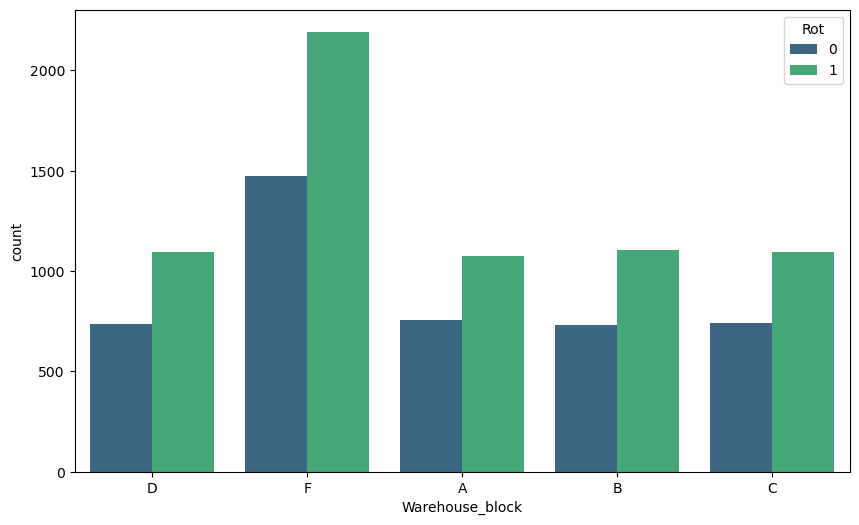

In [14]:
# Membuat plot
plt.figure(figsize = (10, 6))
sns.countplot(x='Warehouse_block', hue = 'Rot',
              data = df, palette='viridis')
plt.show()

Dalam data pie kita mendapatkan informasi distribusi warehouse dengan beberapa block yaitu A,B,C,D,dan F dan dari analisa yang kita dapat Block F memiliki porsi pengiriman yang paling banyak yaitu 33.7%, serta di dalam diagram batang menunjukan hal yang sama namun juga memiliki masalah pengiriamn yang sama masih banyak nya pengiriman yang tidak tepat waktu.

In [15]:
# Membuat px pie data menampilkan
warehouse = df['Warehouse_block'].value_counts().reset_index()
warehouse.columns = ['warehouse', 'value_counts']
fig = px.pie(warehouse, names = 'warehouse', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.matter_r,
             width = 500, height = 400,
             hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

Dengan informasi ini, Anda dapat melihat dengan jelas distribusi data di kolom 'Warehouse_block' dalam DataFrame Anda. Anda dapat mengetahui blok gudang mana yang paling umum dan mana yang paling jarang muncul dalam data Anda. Hal ini dapat membantu dalam pengambilan keputusan atau analisis lebih lanjut terkait manajemen stok atau penempatan barang di gudang.

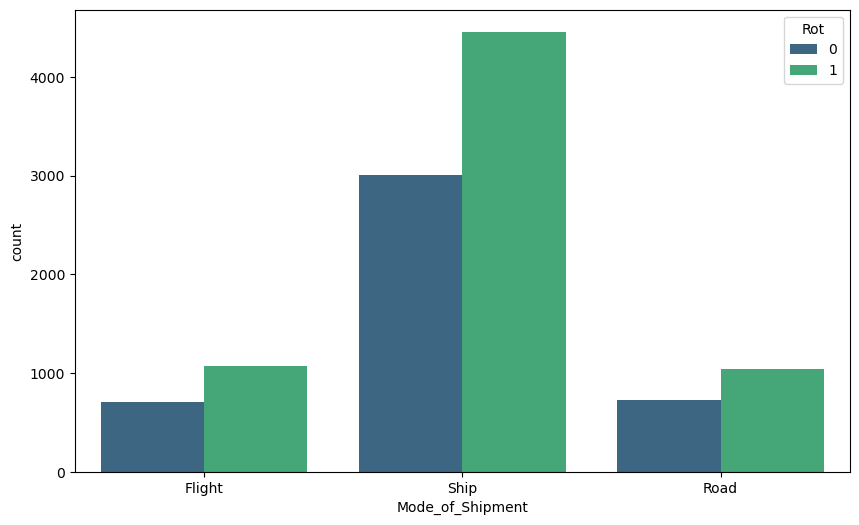

In [16]:
# Plot hubungan jenis pengiriman dan Rot
plt.figure(figsize = (10, 6))
sns.countplot(x='Mode_of_Shipment', hue = 'Rot',
              data = df, palette='viridis')
plt.show()

Analisa mode of shipment menujukan distribusi yaitu :
- Ship 67.8% dengan distibusi yang paling tinggi melayani pengantaran barang.
- Disusul Flight 16.2% dengan distribusi di bawah ship.
- Paling sedikit yaitu Road 16% namun tidak terlalu jauh dengan Flight.

Kita lihat Rot berdasarkan mode shipment ternyata semua memiliki pengiriman yang tidak tepat waktu.

In [17]:
# Pie jenis pengiriman
Mode_of_Shipment = df['Mode_of_Shipment'].value_counts().reset_index()
Mode_of_Shipment.columns = ['Mode_of_Shipment', 'value_counts']
fig = px.pie(Mode_of_Shipment, names = 'Mode_of_Shipment', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.matter_r,
             width = 500, height = 400,hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

Distribusi Mode Pengiriman: Grafik pie ini memberikan gambaran visual tentang seberapa sering masing-masing jenis pengiriman digunakan dalam data Anda. Setiap sektor dalam grafik pie mewakili salah satu jenis pengiriman (misalnya, Ship, Flight, Road, Courrier, dan lain-lain).

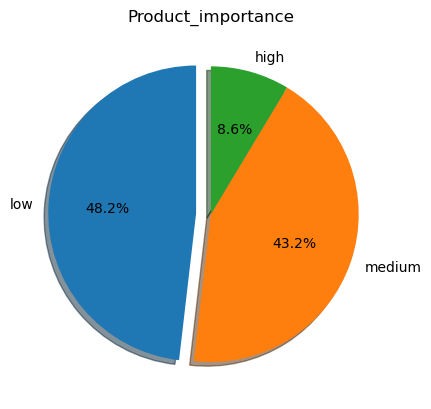

In [18]:
Product_importance = df["Product_importance"].value_counts()
explode = (0.1, 0, 0)
fig , ax = plt.subplots()
ax.pie(Product_importance,labels=Product_importance.index,explode=explode,autopct='%1.1f%%',shadow=True, startangle=90)
ax.set(aspect="equal", title='Product_importance')
fig.show()

Distribusi Tingkat Penting Produk (Product Importance): Grafik pie ini memberikan gambaran visual tentang seberapa sering masing-masing tingkat penting produk muncul dalam data Anda. Setiap sektor dalam grafik pie mewakili salah satu tingkat penting (misalnya, tinggi, sedang, atau rendah).

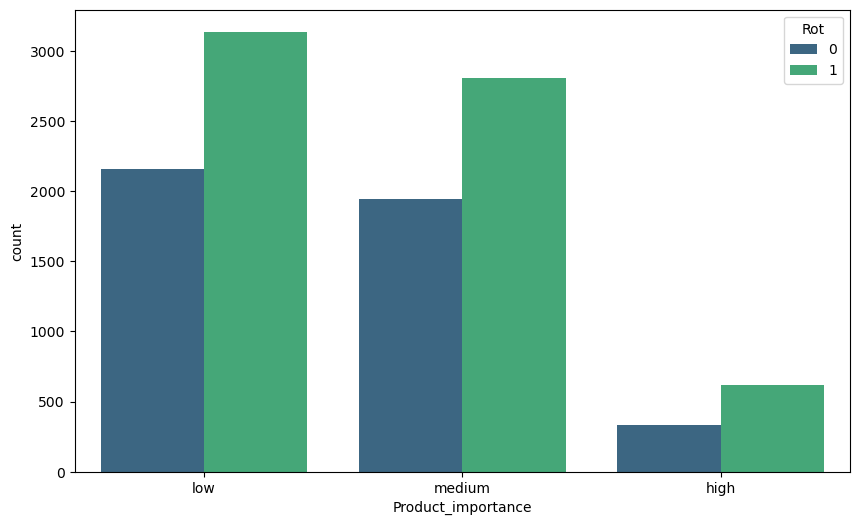

In [19]:
# Membuat Plot Rot
plt.figure(figsize = (10, 6))
sns.countplot(x='Product_importance', hue = 'Rot',
              data = df, palette='viridis')
# Menampilkan plot
plt.show()

Distibusi product importance :
- Low memiliki distribusi 48.2% yang mengartikan banyak barang yang tingkatan low dengan barang-barang yang ekonomis untuk dikirim.
- Medium distribusi 43.2% hasilnya lebih rendah dari product low.
- High dengan distribusi yang paling sedikit 8.6%.

Dalam ketepatan waktu memiliki masalah yang sama yaitu pengiriman tidak tepat waktu,Grafik ini dapat membantu dalam memahami hubungan antara tingkat penting produk dan kondisi rotasi, dan ini bisa digunakan dalam perencanaan dan manajemen stok, khususnya terkait rotasi produk dalam gudang atau toko.


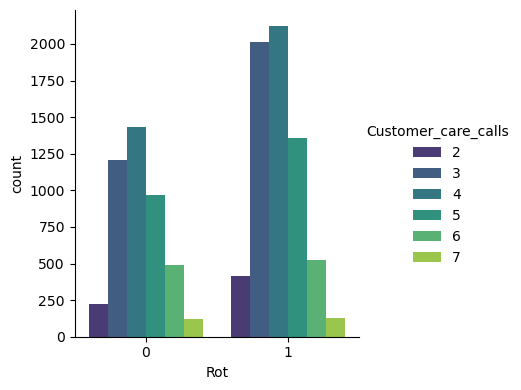

In [20]:
# Definisi Rot dengan fitur yang diinginkan
Rot = df.groupby(['Rot', 'Customer_care_calls']).size().reset_index(name='count')
# Membuat diagram batang (bar chart)
g = sns.catplot(
    data=Rot, kind='bar',
    x='Rot', y='count', hue='Customer_care_calls',
    palette='viridis', height=4
)

# Menampilkan plot
plt.show()

Barchart diatas kita mendapat informasi customer yang sering menanyakan terkait pengiriman adalah yang barangnya tidak tepat waktu,Pengaruh Jumlah Panggilan Layanan Pelanggan: Grafik ini juga membagi data berdasarkan jumlah panggilan layanan pelanggan ke dalam berbagai kategori yang ditunjukkan oleh warna (hue). Ini memungkinkan Anda untuk memahami bagaimana jumlah panggilan layanan pelanggan berkaitan dengan kondisi rotasi produk.

<Axes: >

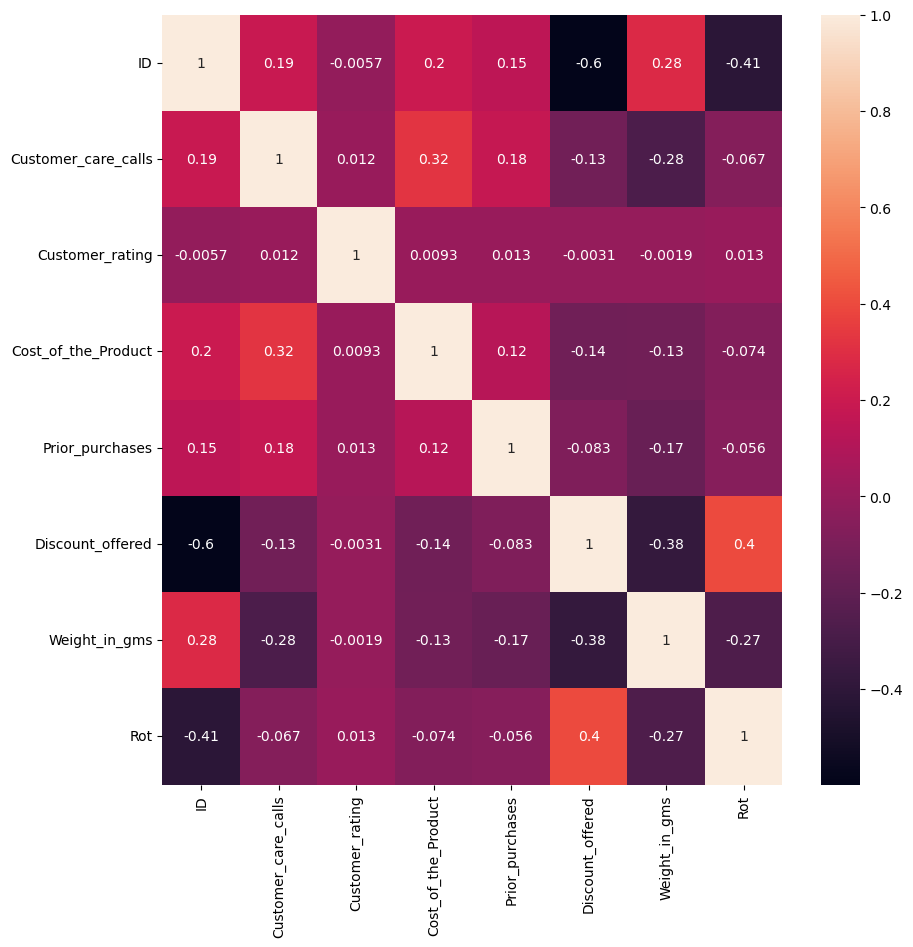

In [21]:
# Menampilkan heatmap kolerasi
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

Dalam heatmap korelasi, kami menemukan bahwa beberapa fitur tidak memiliki korelasi yang signifikan, tetapi kami akan tetap mempertahankan fitur-fitur ini dan melanjutkannya ke tahap berikutnya. Sebaliknya, beberapa fitur yang memiliki korelasi rendah sedang dipertimbangkan untuk dihapus dalam proses selanjutnya.

In [22]:
# count unique columns
print('Number of categories in the variable Warehouse_block     : {}'.format(len(df.Warehouse_block.unique())))
print('Number of categories in the variable Mode_of_Shipment    : {}'.format(len(df.Mode_of_Shipment.unique())))
print('Number of categories in the variable Product_importance  : {}'.format(len(df.Product_importance.unique())))
print('Number of categories in the variable Gender              : {}'.format(len(df.Gender.unique())))

Number of categories in the variable Warehouse_block     : 5
Number of categories in the variable Mode_of_Shipment    : 3
Number of categories in the variable Product_importance  : 3
Number of categories in the variable Gender              : 2


Setelah pemeriksaan, kami menemukan bahwa data cardinality dan unik tidak mencakup sejumlah besar data yang signifikan. Oleh karena itu, kami memutuskan untuk tidak mengurangi cardinality data.

# 5.Feature Engineering

Bagian ini berisi proses penyiapan data, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, drop data dll.) untuk membantu proses pelatihan model.

**Sample Data**

In [23]:
# store 1 random data from the original data to be used as data inference into the data_inf variable
data_inf = df.sample(2, random_state=72)

# remove data inference from df
df.drop(data_inf.index, inplace=True)

# reset indexes for data_inf and df
df.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

# Menghapus kolom 'Rot' dari DataFrame data_inf
data_inf.drop(columns=['Rot'], inplace=True)

data_inf.to_csv('data_inf.csv',index=False)

Mengambil sample data untuk di test pada data inference.

**Split Data**

In [24]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Rot
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10992,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10993,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10994,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10995,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [25]:
# Split X and y
X = df.drop('Rot',axis=1)
y = df.Rot
X.shape

(10997, 11)

Memisahkan Target dengan di split yaitu :

- Fitur Independent di simpan di X.
- Sedangkan dependent di simpan y.

In [26]:
# Mengunakan Split train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

print('Train size :', X_train.shape)
print('Test size  :', X_test.shape)
X_train.head()

Train size : (8797, 11)
Test size  : (2200, 11)


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
2775,2776,B,Ship,4,1,178,3,low,M,19,1906
2184,2185,D,Road,3,2,204,2,medium,F,35,2090
5323,5325,A,Road,4,3,175,3,medium,F,4,5784
9664,9667,D,Ship,7,5,256,4,medium,F,2,1396
4235,4237,D,Road,3,4,247,2,medium,F,2,5016


Setalah kita melakukan split X dan y, selanjutnya split independent dan dependent menjadi data train dan test.

In [27]:
# Drop kolom
X_train = X_train.drop(['ID','Gender'],axis=1)
X_test  = X_test.drop(['ID','Gender'],axis=1)

# check kolom
print('Shape X_train', X_train.shape)
print('Shape X_test',X_test.shape)

Shape X_train (8797, 9)
Shape X_test (2200, 9)


In [28]:
# Check X_train
X_train.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Discount_offered       0
Weight_in_gms          0
dtype: int64

In [29]:
# Check X_test
X_test.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Discount_offered       0
Weight_in_gms          0
dtype: int64

In [30]:
# Check y_train
print('y_train Rot :',y_train.isnull().sum())
# Check y_test
print('y_test Rot  :',y_test.isnull().sum())

y_train Rot : 0
y_test Rot  : 0


Setelah melalui berbagai proses, kami mengidentifikasi faktor-faktor yang tidak memiliki pengaruh signifikan terhadap target. Kami akan menghapus faktor-faktor ini berdasarkan korelasi, sementara ID, yang merupakan data unik, akan tetap kami sertakan dalam daftar drop.

Setalah melakukan drop di check kembali missing value.

In [31]:
#check sentral tendency
X_train.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,8797.000000,8797.000000,8797.000000,8797.000000,8797.000000,8797.000000
mean,4.051267,2.996021,210.492668,3.569171,13.318518,3627.971809
std,1.144210,1.412559,48.057580,1.529651,16.222733,1634.155660
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,170.000000,3.000000,4.000000,1837.000000
50%,4.000000,3.000000,215.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5041.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


Rata-rata Weight memiliki berat 3627 gram, min nya ada pada angka 1001 gram sedangkan max ada di angka 7846 gram.

**Check Outlier**

In [33]:
def diagnostic_plots(df, variable):
    # Define ukurn figure
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [34]:
# Daftar fitur yang akan dihitung skewness-nya
fitur = [
      'Customer_care_calls',
      'Customer_rating',
      'Cost_of_the_Product',
      'Prior_purchases',
      'Discount_offered',
      'Weight_in_gms'
]

# Menghitung skewness untuk setiap fitur
skewness_values = X_train[fitur].apply(lambda x: skew(x)).reset_index()
skewness_values.columns = ['Fitur', 'Skewness']

# Menampilkan hasilnya
skewness_values

,Fitur,Skewness
0,Customer_care_calls,0.402907
1,Customer_rating,-0.003369
2,Cost_of_the_Product,-0.164067
3,Prior_purchases,1.682020
4,Discount_offered,1.813334
5,Weight_in_gms,-0.245680


Setelah memeriksa hasil skewness, kami mengidentifikasi beberapa kolom yang menunjukkan tingkat skewness yang tinggi. Jika kolom-kolom ini bukan termasuk dalam kategori, maka kami akan menerapkan teknik capping IQR untuk mengurangi nilai outlier dalam kolom-kolom tersebut.

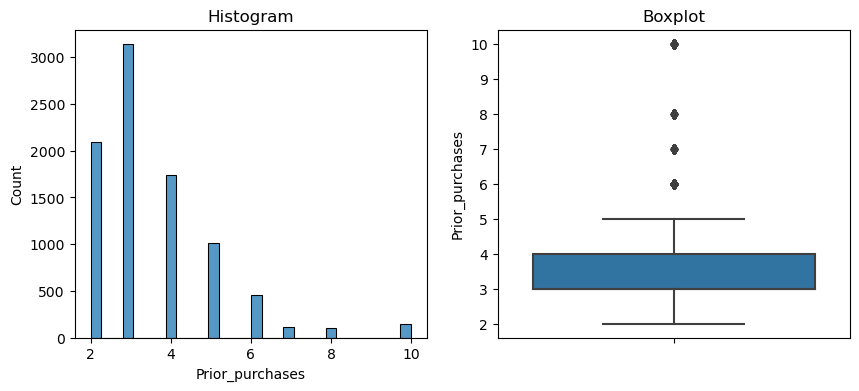

None


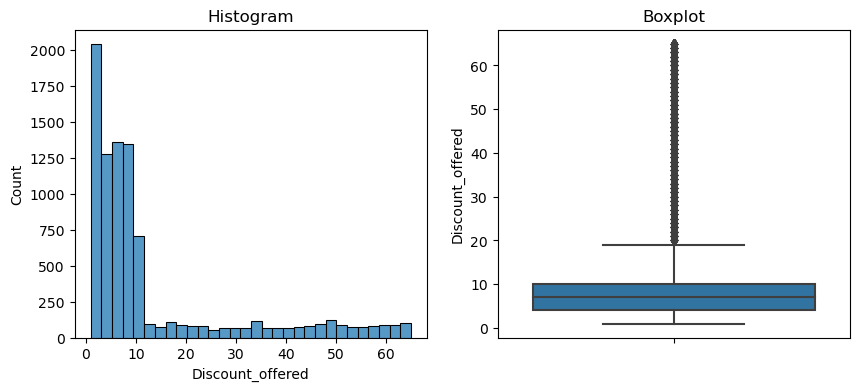

None


In [35]:
# Check hasil oulier
print(diagnostic_plots(X_train, 'Prior_purchases'))
print(diagnostic_plots(X_train, 'Discount_offered'))

Dari hasil pengecheckan outlier kita mendapatkan beebrapa hasil yang skew yaitu fitur `Prior_purchases` dan `Discount_offered` di angka melebihi 1. Dan hasil Diagram boxplot outlier memang memiliki jarak yang jauh maka dari hasil yang kita dapat kam memutuskan menggunakan capping untuk handle outlier agar data tidak berkurang dan kami ingin mempertahankan data yang ada.

**Capping**

In [36]:
# Daftar kolom yang akan di-capping dengan Winsorizer
columns_to_winsorize = ['Prior_purchases','Discount_offered']

# Membuat objek Winsorizer
winsoriser = Winsorizer(capping_method='iqr', tail='both', fold=3)

# Menggunakan loop untuk menerapkan Winsorizer ke setiap kolom
for column in columns_to_winsorize:
    X_train[column] = winsoriser.fit_transform(X_train[[column]])

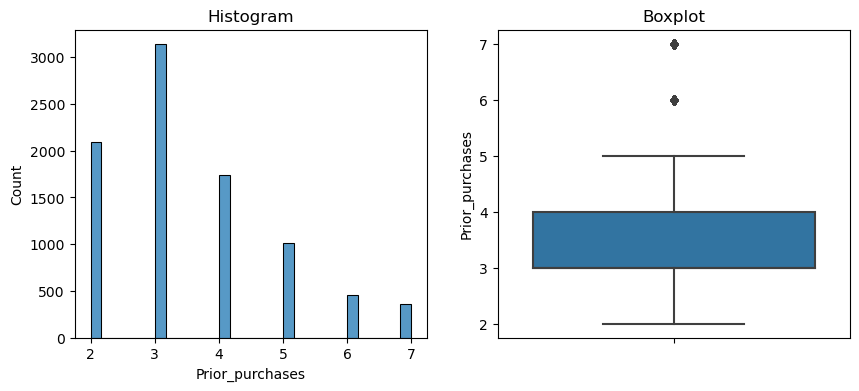

None


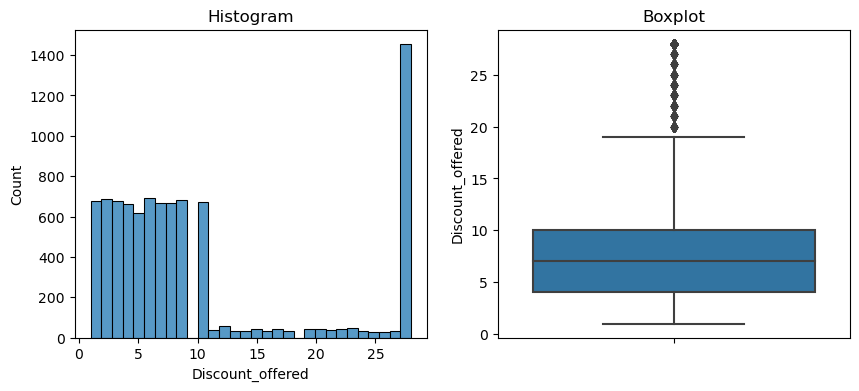

None


In [37]:
# Check hasil oulier
print(diagnostic_plots(X_train, 'Prior_purchases'))
print(diagnostic_plots(X_train, 'Discount_offered'))

Saya memilih untuk menerapkan metode Winsorizer dengan IQR (Interquartile Range) untuk mengatasi outlier dengan pertimbangan sebagai berikut:

Pendekatan Winsorizing dengan IQR adalah pendekatan yang cenderung hati-hati dan tidak menghapus data sepenuhnya atau mengubah data secara signifikan. Pendekatan ini hanya melakukan penyesuaian atau penyuntingan pada nilai-nilai yang berada di luar rentang tertentu tanpa mengubah distribusi data secara mendasar.

Tujuan dari metode ini adalah untuk meminimalkan pengaruh outlier terhadap analisis statistik seperti mean, median, dan deviasi standar, yang dapat sangat dipengaruhi oleh nilai-nilai ekstrem. Hal ini membantu melindungi hasil analisis dari kemungkinan gangguan yang mungkin disebabkan oleh outlier.

Dengan menggunakan IQR, kami tetap dapat mempertahankan informasi yang mungkin dapat diperoleh dari outlier tanpa harus sepenuhnya menghilangkan nilai-nilai tersebut.

In [38]:
# check target

y.value_counts()

1    6562
0    4435
Name: Rot, dtype: int64

Saya memutuskan untuk tidak melakukan balancing karena menurut penilaian saya, data target masih dalam kategori moderate dan tidak memerlukan proses balancing.

**Encoder**

In [39]:
# drop kolom
cat_col_odl = ['Product_importance']
cat_col_ohe = ['Mode_of_Shipment','Warehouse_block']
# menampilkan data
print(cat_col_odl)
print(cat_col_ohe)

['Product_importance']
['Mode_of_Shipment', 'Warehouse_block']


Sebelum kami encode data akan dipisahkan terlebih dahulu untuk di pisah data yang akan dilakukan Onehotencoder dan Ordinalencoder.
Kenapa kolom `Mode_of_Shipment`,`Warehouse_block` Menghindari Bias: One-Hot Encoder sangat berguna untuk menghindari bias yang tidak diinginkan yang dapat timbul jika Anda mengkodekan data kategori menjadi angka-angka yang memiliki urutan tertentu juga tidak ada urutan yang jelas pada data.

Dan kenapa kolom `Product_importance` kami gunakan Ordinal karena Ordinal Encoder digunakan ketika memiliki data kategori yang memiliki urutan atau tingkatan yang berarti di antara nilai-nilainya.



In [40]:
# memisahkan data numerik dan kategori
num_col = X_train.select_dtypes(include=np.number).columns.tolist()

# menampilkan data
print('Numerical columns:',num_col)

Numerical columns: ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']


Kami telah menyiapkan data dan mengisolasi komponen data numerik untuk proses scaling. Keputusan kami adalah untuk menggunakan MinMaxScaler dengan alasan tertentu. Salah satu alasan adalah untuk mengurangi sensitivitas terhadap outlier. Metode Min-Max Scaling cenderung lebih stabil dalam menghadapi pengaruh dari outlier karena kisaran nilai yang dihasilkannya biasanya terbatas antara 0 dan 1. Dengan demikian, nilai-nilai outlier tetap dalam kisaran yang sama dengan data lainnya.


**Pipeline**

In [41]:
# Pembuatan pipeline dengan make pipeline
num_pipeline = make_pipeline(MinMaxScaler())

cat_pipeline_ohe = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

cat_pipeline_odl = make_pipeline(OrdinalEncoder(categories=[['low', 'medium', 'high']]))

preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_col),
    ('pipe_cat_ohe', cat_pipeline_ohe, cat_col_ohe),
    ('pipe_cat_odl', cat_pipeline_odl, cat_col_odl)
])

Disini kita menggunakan pipeline untuk mempermudah dalam meringkas baris kode. Didalam pipeline dilakukan Scaling dan Encoding.

**Pipeline itu apa**

Pipeline adalah metode yang digunakan dalam pemrosesan data dan machine learning untuk menyusun alur kerja pemrosesan data dengan cara yang terstruktur. Ini melibatkan serangkaian langkah atau operasi yang dilakukan secara berurutan pada data sebelum data tersebut digunakan untuk melatih model machine learning atau melakukan prediksi.
- Kegunaan untuk meringkas kode.
- Pencegahan Data Leakage: Mencegah kebocoran data dengan memisahkan tahapan pemrosesan data dengan benar.




# 6.Model Definition

Mendefinisikan model K-Nearest Neighbor, Support Vector Machine, Decision Tree dan Random Forest.

**K-Nearest Neighbor**

In [42]:
# Definisi model
knn = make_pipeline(preprocessing_pipeline, KNeighborsClassifier())

K-Nearest Neighbors (K-NN) adalah salah satu algoritma pembelajaran mesin yang digunakan untuk klasifikasi dan regresi. Ini adalah algoritma yang relatif sederhana tetapi memiliki kelebihan dan kekurangan yang perlu dipertimbangkan dalam penggunaannya:
1. Sederhana dan Mudah Dimengerti: K-NN adalah salah satu algoritma yang paling mudah dimengerti dalam pembelajaran mesin. Ini cocok untuk pemula dan sering digunakan sebagai pengantar untuk pemahaman dasar pembelajaran mesin.
2. Dapat Menangani Data Non-Linier: K-NN dapat digunakan untuk masalah klasifikasi yang tidak memiliki pemisahan linier yang jelas antara kelas-kelas.

Kekurangan K-Nearest Neighbors (K-NN):
1. Sensitif Terhadap Data Outlier: K-NN sensitif terhadap data outlier. Titik data yang jauh dari sebagian besar tetangganya dapat mempengaruhi hasil prediksi secara signifikan.
2. Tidak Mendukung Data Categorical: K-NN biasanya digunakan untuk data numerik, dan memerlukan pengolahan khusus untuk mengatasi data kategorikal dll.

**Support Vector Machine**

In [43]:
# Devinisi model
svm = make_pipeline(preprocessing_pipeline, SVC())

Support Vector Machine (SVM) adalah suatu algoritma dalam bidang machine learning yang digunakan untuk menyelesaikan masalah klasifikasi dan regresi. SVM memiliki sejumlah aspek positif dan negatif yang perlu dipertimbangkan saat memilih dan menerapkan algoritma ini.
1. Efektif dalam Kasus Data yang Tidak Linier: SVM dapat mengatasi masalah klasifikasi yang tidak memiliki pemisahan linier dengan menggunakan fungsi kernel. Fungsi kernel memungkinkan SVM untuk melakukan transformasi data ke ruang dimensi yang lebih tinggi di mana pemisahan linier dapat dicapai.
2. Robust terhadap Overfitting: SVM cenderung lebih tahan terhadap overfitting (model terlalu sesuai dengan data pelatihan) jika parameter C (trade-off antara margin dan error pelatihan) dipilih dengan bijak.

Kekurangan SVM :
1. Keterbatasan dalam Kasus Regresi: Meskipun SVM terutama digunakan untuk klasifikasi, implementasi SVM untuk regresi (SVR) lebih kompleks dan kurang umum dibandingkan dengan metode regresi lainnya seperti regresi linear.
2. Ketergantungan pada Tuning Parameter: Kinerja SVM sangat tergantung pada parameter C dan kernel yang dipilih. Menentukan parameter yang optimal bisa memerlukan eksperimen yang cermat.

**Decision Tree Classifier**

In [44]:
# Devinisi model
tree = make_pipeline(preprocessing_pipeline, DecisionTreeClassifier())

Decision Tree (Pohon Keputusan) adalah suatu algoritma dalam machine learning yang digunakan untuk melakukan klasifikasi dan regresi. Algoritma ini melakukan pengambilan keputusan atau pembuatan prediksi dengan cara membagi data menjadi sejumlah aturan keputusan yang sederhana, membentuk struktur berbentuk pohon.
Kelebihan Decision Tree:
1. Penanganan Data Campuran: Decision Tree dapat menangani dataset dengan campuran fitur kategoris dan numerik dengan baik. Ini tidak memerlukan normalisasi atau pemrosesan khusus pada data.
2. Kemampuan Menangani Missing Values: Decision Tree dapat menangani data yang memiliki nilai yang hilang (missing values) tanpa memerlukan imputasi (pengisian nilai yang hilang) terlebih dahulu.

kemampuan menangani missing value decision tree dapat menangani data yang memiliki nilai yang hilang  missing value tanpa memerlukan umputasi pengisian nilai yang hilang terlebih dahulu 
kemampuan menangani missing value decision tree dapat menangani data yang memiliki nilai yagn hilang missing value tanpa memrlukan imputasi

Kekurangan :
1. Overfitting: Decision Tree cenderung rentan terhadap overfitting jika tidak diatur dengan benar. Pohon yang terlalu dalam dan kompleks dapat mempelajari detail-data sampel pelatihan yang noise, tetapi tidak menggeneralisasi dengan baik pada data yang belum pernah dilihat sebelumnya.
2. Kerentanan terhadap Variasi Data: Decision Tree sensitif terhadap perubahan kecil dalam data pelatihan, yang dapat menghasilkan pohon yang berbeda. Hal ini dapat mempengaruhi stabilitas model.

**Random Forest**

In [45]:
#Devinisi model
rdf = make_pipeline(preprocessing_pipeline, RandomForestClassifier())

Random Forest adalah algoritma ensemble learning yang menggabungkan sejumlah besar pohon keputusan (Decision Tree) untuk membentuk satu model yang memiliki kemampuan lebih kuat. Dalam ensemble learning, teknik ini mengacu pada penggabungan beberapa model untuk meningkatkan performa serta mengurangi risiko overfitting. Berikut adalah beberapa aspek positif dan negatif yang terkait dengan algoritma Random Forest.

Kelebihan :
1. Ketepatan Tinggi: Random Forest adalah salah satu algoritma yang paling akurat dan stabil untuk klasifikasi dan regresi. Ini memiliki kemampuan untuk menghasilkan hasil prediksi yang sangat baik.
2. Penanganan Fitur yang Baik: Random Forest secara otomatis melakukan seleksi fitur dan memberikan skor pada fitur-fitur yang paling informatif. Ini membantu dalam mengidentifikasi fitur-fitur yang paling relevan dalam dataset.

Kekurangan :
1. Kesulitan dalam Interpretasi: Random Forest memiliki struktur yang kompleks dengan banyak pohon keputusan, sehingga bisa sulit untuk diinterpretasikan dengan mudah. Anda mungkin tidak dapat dengan mudah menjelaskan mengapa suatu keputusan diambil oleh model.
2. Kinerja pada Data Tidak Seimbang: Random Forest dapat cenderung memihak kepada kelas mayoritas pada dataset yang tidak seimbang, kecuali jika langkah-langkah penanganan data tidak seimbang diambil.

**XGBClassifier**

In [46]:
# Devinisi model
xgb = make_pipeline(preprocessing_pipeline, XGBClassifier())

XGBoost (Extreme Gradient Boosting) adalah algoritma ensemble learning yang umumnya digunakan untuk melakukan tugas klasifikasi dan regresi. Algoritma XGBoost terkenal karena kinerjanya yang sangat baik dalam kompetisi data science dan memiliki berbagai aspek positif dan negatif yang perlu diperhatikan.
1. Akurasi Tinggi: XGBoost sering memberikan akurasi yang sangat baik dalam tugas klasifikasi dan regresi. Ini adalah salah satu algoritma yang sangat cocok untuk masalah yang membutuhkan prediksi yang tepat.
2. Penanganan Outlier: XGBoost dapat mengatasi outlier dengan baik karena secara alami menggunakan pohon keputusan sebagai komponen utamanya. Pohon keputusan cenderung tidak peka terhadap outlier.

Kekurangan XGBoost (XGBClassifier):
1. Kompleksitas Parameter: XGBoost memiliki banyak parameter yang perlu diatur, termasuk kedalaman pohon, laju pembelajaran, dan lainnya. Memilih parameter yang optimal dapat memerlukan eksperimen yang cermat.
2. Menggunakan Sumber Daya Komputasi yang Signifikan: Pelatihan model XGBoost dapat memerlukan sumber daya komputasi yang signifikan, terutama jika digunakan pada dataset besar.

# 7.Model Training


Selama tahap pelatihan model, algoritma machine learning digunakan untuk menganalisis dan memproses dataset yang telah dipisahkan menjadi data pelatihan. Selama proses ini, algoritma disesuaikan dan ditingkatkan performanya untuk mengenali pola data dan menghasilkan keluaran sesuai dengan tujuan yang diinginkan.

**K-Nearest Neighbor**

In [47]:
# Fit Train
knn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms']),
                                                 ('pipe_cat_ohe',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Mode_of_Shipment',
                                                   'Warehouse_block']),
                                                 ('pipe_cat_odl',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high']]))]),
                                                  ['Product_importance'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

**Support Vector Machine**

In [48]:
# Fit Train
svm.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms']),
                                                 ('pipe_cat_ohe',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Mode_of_Shipment',
                                                   'Warehouse_block']),
                                                 ('pipe_cat_odl',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high']]))]),
                                                  ['Product_importance'])])),
                ('svc', SVC())])

**Decision Tree Classifier**

In [49]:
# Fit Train
tree.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms']),
                                                 ('pipe_cat_ohe',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Mode_of_Shipment',
                                                   'Warehouse_block']),
                                                 ('pipe_cat_odl',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high']]))]),
                                                  ['Product_importance'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

**Random Forest**

In [50]:
# Fit Train
rdf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms']),
                                                 ('pipe_cat_ohe',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Mode_of_Shipment',
                                                   'Warehouse_block']),
                                                 ('pipe_cat_odl',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high']]))]),
                                                  ['Product_importance'])])),
                ('randomforestclassifier', RandomForestClassifier())])

**XGBClassifier**

In [51]:
# Fit Train
xgb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Customer_care_calls',
                                                   'Customer_rating',
                                                   'Cost_of_the_Product',
                                                   'Prior_purchases',
                                                   'Discount_offered',
                                                   'Weight_in_gms']),
                                                 ('pipe_cat_ohe',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Mode_of_...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

# 8.Model Evaluation

Evaluasi model melibatkan pengujian akurasi model pada data pengujian setelah proses pelatihan model. Selama evaluasi model, fokus kami adalah untuk menemukan nilai recall tertinggi yang dapat diandalkan dalam memprediksi data.

**Cross Validation**

In [52]:
# set skfold
skfold=StratifiedKFold(n_splits=5)
# checking cross validation score
cv_knn_model = cross_val_score(knn, X_train, y_train, cv=skfold, scoring="recall")
cv_svm_model = cross_val_score(svm, X_train, y_train, cv=skfold, scoring="recall")
cv_tree_model = cross_val_score(tree, X_train, y_train, cv=skfold, scoring="recall")
cv_rdf_model = cross_val_score(rdf, X_train, y_train, cv=skfold, scoring="recall")
cv_xgb_model = cross_val_score(xgb, X_train, y_train, cv=skfold, scoring="recall")
name_model = []
cv_scores=0
for cv,name in zip([cv_knn_model,cv_svm_model,cv_tree_model,cv_rdf_model,cv_xgb_model],['knn_model','svm_model','tree_model','rdf_model','xgb_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

knn_model
recall - All - Cross Validation  :  [0.66603235 0.66317793 0.64985728 0.65556613 0.61750714]
recall - Mean - Cross Validation :  0.6504281636536632
recall - Std - Cross Validation  :  0.017415887632574782
recall - Range of Test-Set       :  0.6330122760210884 - 0.6678440512862379
--------------------------------------------------
svm_model
recall - All - Cross Validation  :  [0.59276879 0.59276879 0.56327307 0.61655566 0.58896289]
recall - Mean - Cross Validation :  0.5908658420551856
recall - Std - Cross Validation  :  0.01692448730303267
recall - Range of Test-Set       :  0.5739413547521529 - 0.6077903293582182
--------------------------------------------------
tree_model
recall - All - Cross Validation  :  [0.70028544 0.68506185 0.72216936 0.70694577 0.68886775]
recall - Mean - Cross Validation :  0.7006660323501427
recall - Std - Cross Validation  :  0.013301603895186547
recall - Range of Test-Set       :  0.6873644284549562 - 0.7139676362453292
-------------------------

**Cross-validation**

Cross-validation adalah teknik yang digunakan untuk menilai performa model dengan lebih baik daripada hanya membagi dataset menjadi satu set data latihan dan satu set data pengujian. Dalam cross-validation, dataset dibagi menjadi beberapa lipatan (folds) sehingga model dapat diuji pada beberapa sub-kumpulan data yang berbeda.

Dengan pengaturan n_splits=5, dataset akan dibagi menjadi 5 lipatan atau bagian yang setara. Proses cross-validation kemudian akan dilakukan dalam 5 iterasi, di mana pada setiap iterasi, salah satu lipatan akan digunakan sebagai data pengujian, sedangkan yang lainnya digunakan sebagai data pelatihan. Ini berarti model Anda akan diuji pada setiap lipatan yang berbeda, dan hasil pengujian akan diambil rata-ratanya untuk memberikan perkiraan kinerja model secara keseluruhan. Berdasarkan hasil Cross-validation dengan 5 lipatan, kami menemukan bahwa model terbaik adalah model Decision Tree, sehingga model Decision Tree akan digunakan dalam analisis kami.

Hasil dari Recall mean merupakan nilai rata-rata dari recall yang dihasilkan dalam proses Cross-Validation. Ini memberikan perkiraan kinerja rata-rata model Anda pada data yang belum pernah dilihat sebelumnya. Semakin tinggi nilai "recall mean," semakin baik model dalam mengenali kelas positif dalam situasi tertentu. Selain itu, semakin rendah standar deviasi, semakin konsisten kinerja model dalam berbagai iterasi cross-validation.



## **Decision Tree Classifier**

In [53]:
# membuat variable predict
y_pred_train_tree = tree.predict(X_train)
y_pred_test_tree = tree.predict(X_test)

recall Score - Test Set   :  0.7276205049732212 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3542
           1       1.00      1.00      1.00      5255

    accuracy                           1.00      8797
   macro avg       1.00      1.00      1.00      8797
weighted avg       1.00      1.00      1.00      8797

              precision    recall  f1-score   support

           0       0.59      0.58      0.59       893
           1       0.72      0.73      0.72      1307

    accuracy                           0.67      2200
   macro avg       0.65      0.65      0.65      2200
weighted avg       0.67      0.67      0.67      2200



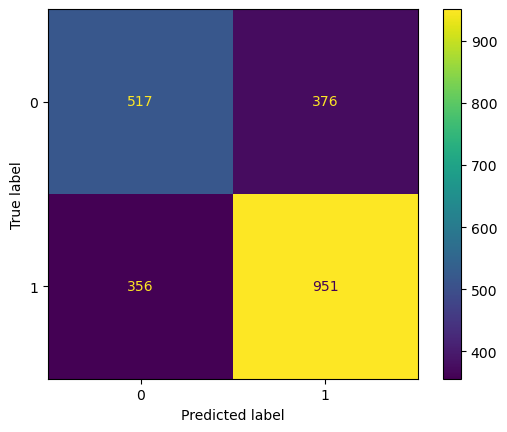

In [54]:
# Model Evaluation - Train Set

print('recall Score - Test Set   : ', recall_score(y_test, y_pred_test_tree), '\n')
print(classification_report(y_train, y_pred_train_tree))

# Model Evaluation - Test Set

print(classification_report(y_test, y_pred_test_tree))

# Confusion Matrix - test Set
cm_test_tree = confusion_matrix(y_test, y_pred_test_tree)
ConfusionMatrixDisplay(cm_test_tree).plot()

Setelah kita memiliki model terbaik, kami melakukan prediksi menggunakan dataset uji, namun hasil pengujian pada data uji menunjukkan kinerja yang kurang memuaskan. Sepertinya model yang kami kembangkan lebih cenderung untuk memprediksi angka positif, yaitu 1, seperti yang dapat dilihat dari skor dan tabel kebingungan (confusion matrix). Mesin mampu memprediksi banyak kasus True Positif sebanyak 951, sementara jumlah True Negatif hanya 517, dengan jumlah False Negatif sebanyak 376 dan False Positive sebanyak 356.

Untuk mengatasi hal ini, kami melakukan penyetelan hyperparameter dengan menggunakan metode Grid Search. Tujuannya adalah untuk mencari kombinasi parameter terbaik yang dapat meningkatkan skor model dan menghasilkan kinerja yang lebih baik. Penting untuk diingat bahwa nilai-nilai ini bersifat dinamis dan dapat berubah dari waktu ke waktu seiring dengan pengujian dan penyetelan yang terus berlanjut.

## **Grid Search**

In [55]:
# set hyperparameter tuning
param_grid_tree = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__max_depth': [None, 10, 20, 30, 40],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
}
param_grid_tree

{'decisiontreeclassifier__criterion': ['gini', 'entropy'],
 'decisiontreeclassifier__max_depth': [None, 10, 20, 30, 40],
 'decisiontreeclassifier__min_samples_split': [2, 5, 10],
 'decisiontreeclassifier__min_samples_leaf': [1, 2, 4]}

Kita beri beberapa Hyperparameter tuning yang kita dapat pada sklearn DecisionTreeClassifier bisa di dapakan disini https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html parameter yang kita masukan adalah :
- criterion': ['gini', 'entropy','log_loss']
- max_depth': [None, 10, 20, 30, 40]
- min_samples_split': [2, 5, 10]
- min_samples_leaf': [1, 2, 4]

In [56]:
# Train with Grid Search
tree_gridcv = GridSearchCV(estimator=tree,
                         param_grid=param_grid_tree,
                         refit=True,
                         return_train_score=True,
                         cv=5,
                         n_jobs=-1,
                         verbose=3,
                         scoring='recall')
tree_gridcv.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[CV 5/5] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=None, decisiontreeclassifier__min_samples_leaf=1, decisiontreeclassifier__min_samples_split=2;, score=(train=1.000, test=0.677) total time=   0.1s
[CV 2/5] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=None, decisiontreeclassifier__min_samples_leaf=1, decisiontreeclassifier__min_samples_split=2;, score=(train=1.000, test=0.684) total time=   0.1s
[CV 4/5] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=None, decisiontreeclassifier__min_samples_leaf=1, decisiontreeclassifier__min_samples_split=2;, score=(train=1.000, test=0.703) total time=   0.1s
[CV 1/5] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=None, decisiontreeclassifier__min_samples_leaf=1, decisiontreeclassifier__min_samples_split=2;, score=(train=1.000, test=0.702) total time=   0.1s
[CV 3/5] END decisiontreeclassifier__criterion=gini, decisiontre

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipe_num',
                                                                         Pipeline(steps=[('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Customer_care_calls',
                                                                          'Customer_rating',
                                                                          'Cost_of_the_Product',
                                                                          'Prior_purchases',
                                                                          'Discount_offered',
                                                                          'Weight_in_gms']),
                                                                        ('pipe_cat_ohe',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unk...
                                                                         ['Product_importance'])])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': [None, 10, 20, 30,
                                                               40],
                         'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
                         'decisiontreeclassifier__min_samples_split': [2, 5,
                                                                       10]},
             return_train_score=True, scoring='recall', verbose=3)

In [57]:
# Display Best Hyperparamters from Random Search
tree_gridcv.best_params_

{'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': None,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2}

Setalah kita lakukan grid search dan dilakukan fit pada X_train dan y_train kita mendapatkan hasil best parameter terbaik yaitu :
- criterion': 'gini'
- max_depth': 40
- min_samples_leaf': 1
- min_samples_split': 2

recall Score - Test Set   :  0.7016067329762815 

Classification Report : 
               precision    recall  f1-score   support

           0       0.57      0.58      0.58       893
           1       0.71      0.70      0.71      1307

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.66      0.65      0.65      2200
 



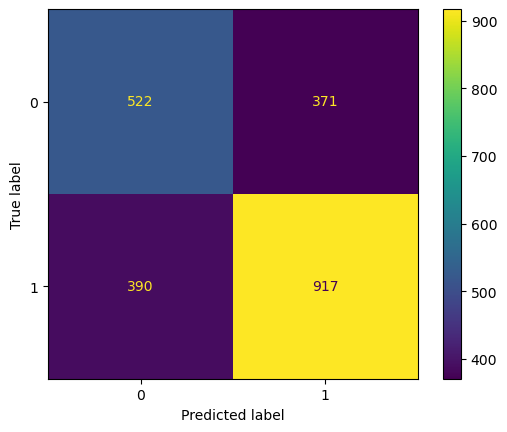

In [58]:
# Get Best Estimator
tree_gridcv_best = tree_gridcv.best_estimator_

y_pred_treegv = tree_gridcv_best.predict(X_test)
print('recall Score - Test Set   : ', recall_score(y_test, y_pred_treegv), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_treegv), '\n')
cm_tree_gv = confusion_matrix(y_test, y_pred_treegv)
ConfusionMatrixDisplay(cm_tree_gv).plot()

Setelah melakukan penyetelan parameter terbaik, kami mencapai skor recall sebesar 0,71, yang menunjukkan peningkatan dibandingkan dengan hasil sebelum melakukan penyetelan parameter. Namun, kami menyadari bahwa skor ini bersifat dinamis dan dapat berubah dari waktu ke waktu jika kami mengulang proses yang sama.

Selain itu, dalam metrik kebingungan kami, kita melihat penurunan yang konsisten dalam nilai False Negatif, dari 377 menjadi 368. Perlu diingat bahwa hasil ini juga dapat berfluktuasi jika kami menjalankan proses yang sama sekali lagi.

In [59]:
print('Score Recall :')
print('Classification Report Baseline: \n', recall_score(y_test, y_pred_test_tree), '\n')
print('Classification Report Hyperparameter dan Grid Search : \n', recall_score(y_test, y_pred_treegv), '\n')

Score Recall :
Classification Report Baseline: 
 0.7276205049732212 

Classification Report Hyperparameter dan Grid Search : 
 0.7016067329762815 



Dalam baseline Decision Tree Classifier kita mendapatkan score 0.72 setalah kita melakukan grid search dan hyperparameters tuning meningkat menjadi 0.70.

**Kelebihan Model**

Penanganan Data Campuran: Decision Tree dapat menangani dataset dengan campuran fitur kategoris dan numerik dengan baik. Ini tidak memerlukan normalisasi atau pemrosesan khusus pada data.
Kemampuan Menangani Missing Values: Decision Tree dapat menangani data yang memiliki nilai yang hilang (missing values) tanpa memerlukan imputasi (pengisian nilai yang hilang) terlebih dahulu.


**Kelemahan model**

Saya menyadari bahwa beberapa model mungkin memberikan hasil yang sangat baik saat memprediksi data pelatihan, tetapi kemungkinan hanya menghafal pola data. Masalah muncul ketika model ini diuji dengan data baru atau data yang belum pernah dilihat sebelumnya, di mana model mulai kesulitan dan gagal memberikan prediksi yang akurat. Hal ini dapat menjadi masalah serius ketika model digunakan dalam situasi dunia nyata, karena dapat menghasilkan peningkatan keluhan dari pelanggan yang pada gilirannya mengurangi tingkat kepercayaan dalam bisnis pengiriman ini.

Karenanya, rencana kami adalah meningkatkan performa model kami di masa depan dengan beberapa opsi model alternatif. Selain itu, kami akan mengevaluasi penggunaan teknik ensemble seperti stacking dan bagging sebagai alternatif yang lebih baik. Ini akan membantu dalam meningkatkan kinerja model secara keseluruhan dan mengurangi masalah yang disebutkan sebelumnya.

**Check Karakteristik**

In [60]:
# Membuat variable baru
X_test_1 = X_test.copy()
X_test_1['Rot'] = y_test

# Menambahkan kolom baru
X_test_1['Prediction'] = y_pred_treegv
X_test_1.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Rot,Prediction
6560,C,Road,4,3,256,5,low,5,1533,1,1
1112,A,Flight,5,1,222,3,high,21,2351,1,1
3181,A,Ship,3,3,132,3,low,6,5721,1,1
4057,A,Ship,4,2,249,2,medium,7,5876,1,1
6152,B,Road,5,4,269,2,medium,2,5962,0,1


In [61]:
# Hitung rata-rata dari kolom-kolom numerik pada dataframe False_negative
False_negatif = X_test_1[(X_test_1['Rot'] == 1 ) &(X_test_1['Prediction'] == 0)]
False_negatif.select_dtypes(exclude='object').mean()

Customer_care_calls       4.138462
Customer_rating           3.084615
Cost_of_the_Product     215.279487
Prior_purchases           3.689744
Discount_offered          5.587179
Weight_in_gms          4219.146154
Rot                       1.000000
Prediction                0.000000
dtype: float64

Karakterisitik False Negatif yaitu :
Customer_care_calls (Panggilan Ke Layanan Pelanggan): Rata-rata panggilan ke layanan pelanggan adalah sekitar 4.13. Ini mungkin menunjukkan bahwa sebagian besar pelanggan melakukan beberapa panggilan ke layanan pelanggan untuk menyelesaikan masalah atau mendapatkan bantuan terkait produk atau layanan.

Customer_rating (Rating Pelanggan): Rata-rata rating pelanggan adalah sekitar 3.08. Ini bisa menjadi indikasi bahwa sebagian besar pelanggan memberikan rating yang rendah atau sedang terhadap produk atau layanan.

Cost_of_the_Product (Harga Produk): Rata-rata harga produk adalah sekitar 215.27. Ini menunjukkan bahwa produk dalam dataset memiliki variasi harga, dengan rata-rata di sekitar angka tersebut.

In [62]:
# Hitung rata-rata dari kolom-kolom numerik pada dataframe True_negative
true_negatif = X_test_1[(X_test_1['Rot'] == 0 ) &(X_test_1['Prediction'] == 0)]
true_negatif.select_dtypes(exclude='object').mean()

Customer_care_calls       4.103448
Customer_rating           2.959770
Cost_of_the_Product     209.381226
Prior_purchases           3.670498
Discount_offered          5.643678
Weight_in_gms          4296.591954
Rot                       0.000000
Prediction                0.000000
dtype: float64

Karakteristik true negatif :
Customer_care_calls (Panggilan Ke Layanan Pelanggan): Rata-rata panggilan ke layanan pelanggan adalah sekitar 4.10. Meskipun nilainya sedikit lebih rendah dibandingkan dengan yang sebelumnya, ini masih menunjukkan bahwa sebagian besar pelanggan melakukan beberapa panggilan ke layanan pelanggan.

Customer_rating (Rating Pelanggan): Rata-rata rating pelanggan adalah sekitar 2.95. Ini juga lebih rendah daripada sebelumnya, menunjukkan bahwa pelanggan dalam data ini cenderung memberikan rating yang lebih rendah atau sedang terhadap produk atau layanan.

Cost_of_the_Product (Harga Produk): Rata-rata harga produk adalah sekitar 209.38. Nilai ini lebih rendah daripada sebelumnya, menunjukkan variasi dalam harga produk yang lebih rendah.

In [63]:
# Menghitung rata - rata
X_test1 = X_test_1.drop('Prediction',axis=1)
X_test1.groupby('Rot').mean()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
Rot,,,,,,
0,4.155655,2.954087,211.426652,3.650616,5.634938,4219.950728
1,4.007651,2.976282,207.285386,3.501148,18.997705,3273.298393


Mari kita bahas karakteristik masing-masing atribut:

Customer_care_calls:
Untuk "Rot=0," rata-rata panggilan ke layanan pelanggan adalah sekitar 4.15.
Untuk "Rot=1," rata-rata panggilan ke layanan pelanggan adalah sekitar 4.00.

Ini menunjukkan bahwa rata-rata jumlah panggilan ke layanan pelanggan lebih tinggi pada kelompok "Rot=0" daripada pada kelompok "Rot=1."


Customer_rating:
Untuk "Rot=0," rata-rata rating pelanggan adalah sekitar 2.95.
Untuk "Rot=1," rata-rata rating pelanggan adalah sekitar 2.97.

Ini menunjukkan bahwa rata-rata rating pelanggan sedikit lebih tinggi pada kelompok "Rot=1" daripada pada kelompok "Rot=0."

Cost_of_the_Product:
Untuk "Rot=0," rata-rata harga produk adalah sekitar 211.42.
Untuk "Rot=1," rata-rata harga produk adalah sekitar 207.28.

Ini mengindikasikan bahwa rata-rata harga produk cenderung lebih tinggi pada kelompok "Rot=0" dibandingkan dengan kelompok "Rot=1."

Discount_offered:
Untuk "Rot=0," rata-rata diskon yang ditawarkan adalah sekitar 5.63.
Untuk "Rot=1," rata-rata diskon yang ditawarkan adalah sekitar 18.99.

Ini mengindikasikan bahwa rata-rata diskon yang ditawarkan jauh lebih tinggi pada kelompok "Rot=1" dibandingkan dengan kelompok "Rot=0."

# Model Saving

In [ ]:
# save pipeline
with open('donePipeline.pkl','wb') as file:
  pickle.dump(tree_gridcv,file)

Menyimpan Final proses dalam file final pipeline1 untuk di gunakan di model inference.

# Model Inference

Model inference di ipynb yang berbeda.

# Pengambilan Kesimpulan

**Conceptual Problems**

Bagging itu apa

Bagging, yang merupakan kependekan dari "Bootstrap Aggregating," adalah metode ensemble learning yang digunakan dalam machine learning dengan tujuan untuk meningkatkan performa model. Metode ini diterapkan untuk mengatasi masalah overfitting, meningkatkan kestabilan model, dan menghasilkan prediksi yang lebih andal dan konsisten.

Bagging cara kerja

Bootstrap Sampling: Bagging memulai dengan mengambil sampel acak dari dataset pelatihan asli dengan penggantian. Artinya, beberapa data contoh bisa muncul beberapa kali dalam sampel, sementara yang lain mungkin tidak ada sama sekali. Hasil dari langkah ini adalah pembentukan dataset baru yang disebut "bootstrap sample."

Manfaat dari Bagging adalah bahwa melalui penggabungan hasil dari beberapa model yang telah dilatih pada dataset yang berbeda, itu dapat mengurangi variabilitas dalam prediksi dan menghasilkan model yang lebih konsisten. Ini adalah salah satu bentuk dari "ensemble learning," di mana kita mengkombinasikan hasil dari beberapa model untuk meningkatkan performa dan stabilitas prediksi.

Perbedaan RandomForest dan Xgboost

Random Forest dan XGBoost merupakan dua pendekatan berbeda dalam ensemble learning yang mengkombinasikan beberapa model dasar guna meningkatkan prediksi. Terdapat perbedaan utama dalam cara kerja kedua algoritma ini:

Algoritma Random Forest dan metode Boosting, seperti XGBoost, adalah dua pendekatan dalam ensemble learning yang berbeda dalam cara mereka menggabungkan beberapa model dasar untuk meningkatkan kinerja prediksi. Perbedaan utama terletak pada mekanisme dasar di balik cara kerja keduanya.

Random Forest:

Proses Pengambilan Sampel: Dalam Random Forest, teknik pengambilan sampel bootstrap digunakan untuk menciptakan sejumlah dataset pelatihan yang beragam. Setiap dataset ini digunakan untuk melatih Decision Trees yang bekerja secara independen. Selain itu, Random Forest juga menerapkan sub-sampling pada fitur (variabel) untuk setiap pohon dalam upaya untuk menghindari terjadinya korelasi yang kuat antara pohon-pohon dalam ensemble.

Proses Pengambilan Keputusan: Setelah Decision Trees selesai dilatih, Random Forest mengumpulkan prediksi dari setiap pohon, yang kemudian digabungkan dengan cara menghitung mayoritas suara (mode) dalam konteks masalah klasifikasi atau dengan menghitung rata-rata dalam konteks masalah regresi.

XGBoost (Extreme Gradient Boosting):

Proses Pengambilan Sampel: XGBoost menerapkan konsep boosting, yang berarti bahwa setiap pohon berikutnya (weak learner) dalam ensemble difokuskan pada sampel-sampel yang sebelumnya telah salah diklasifikasikan oleh pohon-pohon sebelumnya. Dengan kata lain, setiap pohon berikutnya berusaha untuk memperbaiki kesalahan yang terjadi pada langkah-langkah sebelumnya.

Proses Pengambilan Keputusan: XGBoost juga mengumpulkan hasil prediksi dari semua pohon dalam ensemble, namun, hal ini dilakukan dengan memberikan bobot pada masing-masing pohon berdasarkan seberapa baik kinerja mereka pada iterasi sebelumnya.

Berurutan: XGBoost merupakan algoritma berurutan, yang berarti bahwa setiap pohon dalam ensemble bergantung pada hasil pohon-pohon sebelumnya. Dampaknya adalah waktu pelatihan yang mungkin lebih lama dibandingkan dengan Random Forest.

Cross Validation itu apa

Cross-validation (validasi silang) Merupakan metode kunci dalam machine learning yang digunakan untuk mengevaluasi performa model secara obyektif dan mencegah terjadinya overfitting. Ini merupakan teknik evaluasi yang membantu dalam mengestimasi sejauh mana model machine learning dapat berfungsi dengan baik pada data yang belum pernah dihadapi sebelumnya.

Cross Validation cara kerja:

Pembagian Data: Dataset yang ada dibagi menjadi dua komponen utama: satu adalah komponen untuk melatih model (training set), sementara yang lainnya digunakan untuk menguji performa model (testing set). Bagian yang digunakan untuk melatih model digunakan dalam proses pelatihan, sementara yang digunakan untuk menguji digunakan untuk mengevaluasi kinerja model.

Pengulangan: Subset data dibagi lagi menjadi beberapa "lipatan" (folds). Sebagai contoh, dalam metode validasi silang 5 lipatan (5-fold cross-validation), data dibagi menjadi 5 bagian yang sama besar.

Proses Pelatihan dan Pengujian: Model machine learning dilatih dan dievaluasi dalam beberapa iterasi, sejumlah yang sama dengan jumlah lipatan yang ada. Pada setiap iterasi, satu lipatan digunakan sebagai dataset pengujian, sementara yang lainnya digunakan sebagai dataset pelatihan. Dengan demikian, setiap lipatan digunakan sekali sebagai dataset pengujian dan empat kali sebagai dataset pelatihan (dalam contoh 5-fold cross-validation).

**Kesimpulan dan Implikasi Bisnis:**

Hasil analisis yang telah dilakukan menunjukkan pola yang konsisten dalam data, yaitu nilai "Reched on time" dengan label 0 memiliki tingkat yang lebih rendah dibandingkan dengan label 1. Hal ini menjadi dasar untuk membangun model yang dapat memberikan prediksi yang akurat. Meskipun demikian, ada beberapa keterbatasan dalam fitur yang mungkin memengaruhi kualitas prediksi model terhadap data baru. Kami berharap bahwa kelemahan-kelemahan dalam model dapat diperbaiki dengan baik, terutama dalam meningkatkan nilai recall, yang sangat penting dalam upaya untuk meningkatkan layanan kami dan hubungan dengan pelanggan. Ini karena dalam bisnis pengiriman, kepercayaan pelanggan sangat penting, dan kualitas pelayanan kami bergantung pada kemampuan kami dalam memberikan prediksi yang akurat dan tepat waktu.

Dari hasil analisis karakteristik data yang telah dilakukan, berikut beberapa saran untuk memperbaiki akurasi waktu pengiriman dalam sektor e-commerce:

1.Kontrol Kualitas Produk: Walaupun terlihat bahwa pelanggan mungkin memberikan peringkat yang lebih tinggi untuk pengiriman yang tidak tepat waktu, perusahaan harus tetap memantau kualitas produk dan proses pengiriman. Produk dengan harga yang lebih tinggi mungkin lebih cenderung tepat waktu, jadi pastikan bahwa kualitas produk sesuai dengan harganya.

2.Fokus pada Peningkatan Layanan Pelanggan: Perusahaan sebaiknya mempertimbangkan upaya untuk meningkatkan pelayanan pelanggan, terutama dalam penanganan pengiriman yang tidak tepat waktu ("Rot=1"). Ini mungkin melibatkan perbaikan dalam menangani keluhan pelanggan, memberikan informasi pengiriman yang lebih akurat, atau memberikan insentif kepada pelanggan yang mengalami keterlambatan.

3.Rencana Strategis Jangka Panjang: Selain perbaikan operasional segera, perusahaan juga harus memiliki strategi jangka panjang untuk mengatasi masalah ketepatan waktu pengiriman. Ini mungkin melibatkan investasi dalam teknologi yang lebih maju, ekspansi geografis, atau pembaruan model bisnis.

4.Pengelolaan Diskon dengan Bijak: Perusahaan perlu mengelola dengan hati-hati penggunaan tawaran diskon. Tawaran diskon yang signifikan untuk pengiriman yang tidak tepat waktu ("Rot=1") mungkin menjadi solusi sementara, tetapi strategi tersebut dapat berdampak pada margin keuntungan. Pertimbangkan untuk memberikan diskon yang lebih seimbang dan memberikan insentif untuk pengiriman tepat waktu.

5.Edukasi Pelanggan: Perusahaan dapat mengambil inisiatif untuk memberikan pemahaman kepada pelanggan mengenai proses pengiriman, perkiraan waktu pengiriman yang realistis, dan faktor-faktor yang dapat memengaruhi ketepatan waktu. Ini dapat mengurangi ketidakpuasan pelanggan dan mengurangi keluhan yang mungkin muncul karena ketidakpahaman.

6.Pemanfaatan Model Prediktif: Teruslah menggunakan model machine learning yang telah dikembangkan untuk meramalkan ketepatan waktu pengiriman. Dengan demikian, perusahaan dapat mengidentifikasi pengiriman yang berpotensi tidak tepat waktu dan mengambil langkah-langkah pencegahan.
